Section 1: Import packages, cleanse, analyze, and plot Military Expenditure data

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from ipykernel import kernelapp as app
from matplotlib import colors
import six
from matplotlib import style
style.use('ggplot')
#style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import axes3d

In [3]:
# Import csv file
MltrySpnd = pd.read_csv('Military_Expenditure-oa.csv')
# data is in $US m.

,"Military expenditure by country, in constant (2014) US$ m., 1988-2015",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,"Figures are in US $m., at constant 2014 prices...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2015 Current
2,Algeria,615,601,642,657,1100,1183,1439,1394,1588,...,3876,4516,4905,5191,7429,7817,8646,9724,10230,10413
3,Libya,. .,. .,. .,. .,. .,. .,. .,. .,. .,...,953,1440,. .,. .,. .,3124,. .,3289,. .,. .
4,Morocco,1816,1963,1928,2025,2009,2119,2176,2004,1998,...,2597,2896,3093,3310,3334,3574,4083,4049,3740,3268


In [4]:
# Remove describtion and set index as country
MltrySpnd = MltrySpnd.ix[1:,:]
MltrySpnd.rename(columns= MltrySpnd.iloc[0], inplace=True)
MltrySpnd = MltrySpnd.ix[2:,:]
MltrySpnd.set_index('Country', inplace=True)
# Verify
MltrySpnd.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2015 Current
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,615,601,642,657,1100,1183,1439,1394,1588,1909,...,3876,4516,4905,5191,7429,7817,8646,9724,10230,10413
Libya,. .,. .,. .,. .,. .,. .,. .,. .,. .,613,...,953,1440,. .,. .,. .,3124,. .,3289,. .,. .
Morocco,1816,1963,1928,2025,2009,2119,2176,2004,1998,2093,...,2597,2896,3093,3310,3334,3574,4083,4049,3740,3268
Tunisia,354,365,336,343,345,359,371,377,434,429,...,508,549,567,582,692,696,763,922,1078,980
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Consider only the years from 1998 to 2014
MltrySpnd_17yrs = MltrySpnd[MltrySpnd.columns[-19:-2]]
MltrySpnd_17yrs.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,,,
Algeria,2019,2131,2473,2707,2766,2706,3078,3223,3303,3876,4516,4905,5191,7429,7817,8646,9724
Libya,692,534,572,559,719,894,1168,1151,1012,953,1440,. .,. .,. .,3124,. .,3289
Morocco,2118,1795,1358,2457,2338,2476,2407,2498,2521,2597,2896,3093,3310,3334,3574,4083,4049
Tunisia,437,433,452,470,465,484,493,530,553,508,549,567,582,692,696,763,922
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get the G-20 Countries (minus the EU) from a csv file that contains them
G20 = pd.read_csv('G20-oa.csv',names=['Country'])
G20

,Country
0,Argentina
1,Australia
2,Brazil
3,Canada
4,"China, P.R."
5,France
6,Germany
7,India
8,Indonesia
9,Italy


In [7]:
# Filter on only those countries
MltrySpnd_G20 = MltrySpnd_17yrs.ix[G20['Country'],]
MltrySpnd_G20

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Country,,,,,,,,,,,,,,,,,
Argentina,1663,1714,1632,1608,1370,1411,1452,1526,1573,1821,2068,2455,2713,3048,3443,4218,4979
Australia,16041,16829,16780,17449,18195,18527,19291,19969,21040,22331,23145,24877,25184,24835,23965,23757,25784
Brazil,19194,19662,21298,24670,24999,19943,20721,22421,23216,25038,26639,29047,32257,31245,31846,32020,32660
Canada,14251,14866,14623,15011,15087,15364,15946,16647,17421,18994,20469,21404,19332,19985,19004,17567,17854
"China, P.R.",32715,39800,43230,52179,60642,65496,72415,79809,92586,103716,113527,137401,144383,155898,169321,182930,199651
France,61091,61607,60897,60711,61963,63826,65573,64235,64525,64773,64124,68451,65322,63725,62844,62686,63614
Germany,50248,51272,50448,49619,49753,49073,47570,46830,45749,45789,47104,48885,49418,48004,49149,46312,46103
India,22737,26424,27266,28215,28128,28756,33403,35548,35718,36151,41003,48277,48470,48940,48766,48406,50914
Indonesia,2899,2203,2265,2014,2435,3279,3660,3179,3228,3882,3621,3784,4444,5095,5850,7865,6929


In [8]:
# Convert all values to doubles
for column in MltrySpnd_G20:
    MltrySpnd_G20[column] = MltrySpnd_G20[column].astype(float)

In [9]:
# Add 'Average Spending' column with avergae values over the 17 years
MltrySpnd_G20['Average Spendings'] = MltrySpnd_G20.mean(numeric_only=True, axis=1)
MltrySpnd_G20

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average Spendings
Country,,,,,,,,,,,,,,,,,,
Argentina,1663.0,1714.0,1632.0,1608.0,1370.0,1411.0,1452.0,1526.0,1573.0,1821.0,2068.0,2455.0,2713.0,3048.0,3443.0,4218.0,4979.0,2276.117647
Australia,16041.0,16829.0,16780.0,17449.0,18195.0,18527.0,19291.0,19969.0,21040.0,22331.0,23145.0,24877.0,25184.0,24835.0,23965.0,23757.0,25784.0,21058.764706
Brazil,19194.0,19662.0,21298.0,24670.0,24999.0,19943.0,20721.0,22421.0,23216.0,25038.0,26639.0,29047.0,32257.0,31245.0,31846.0,32020.0,32660.0,25698.588235
Canada,14251.0,14866.0,14623.0,15011.0,15087.0,15364.0,15946.0,16647.0,17421.0,18994.0,20469.0,21404.0,19332.0,19985.0,19004.0,17567.0,17854.0,17283.823529
"China, P.R.",32715.0,39800.0,43230.0,52179.0,60642.0,65496.0,72415.0,79809.0,92586.0,103716.0,113527.0,137401.0,144383.0,155898.0,169321.0,182930.0,199651.0,102688.176471
France,61091.0,61607.0,60897.0,60711.0,61963.0,63826.0,65573.0,64235.0,64525.0,64773.0,64124.0,68451.0,65322.0,63725.0,62844.0,62686.0,63614.0,63527.470588
Germany,50248.0,51272.0,50448.0,49619.0,49753.0,49073.0,47570.0,46830.0,45749.0,45789.0,47104.0,48885.0,49418.0,48004.0,49149.0,46312.0,46103.0,48313.294118
India,22737.0,26424.0,27266.0,28215.0,28128.0,28756.0,33403.0,35548.0,35718.0,36151.0,41003.0,48277.0,48470.0,48940.0,48766.0,48406.0,50914.0,37477.764706
Indonesia,2899.0,2203.0,2265.0,2014.0,2435.0,3279.0,3660.0,3179.0,3228.0,3882.0,3621.0,3784.0,4444.0,5095.0,5850.0,7865.0,6929.0,3919.529412


In [211]:
# order descendingly 
MltrySpnd_G20 = MltrySpnd_G20.sort_values(by='Average Spendings', ascending=False)
MltrySpnd_G20.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Average Spendings
Country,,,,,,,,,,,,,,,,,,
USA,398332.0,399314.0,414768.0,418135.0,469486.0,534351.0,582400.0,610176.0,619653.0,635921.0,682967.0,737747.0,757992.0,748646.0,706082.0,650081.0,609914.0,586821.470588
"China, P.R.",32715.0,39800.0,43230.0,52179.0,60642.0,65496.0,72415.0,79809.0,92586.0,103716.0,113527.0,137401.0,144383.0,155898.0,169321.0,182930.0,199651.0,102688.176471
France,61091.0,61607.0,60897.0,60711.0,61963.0,63826.0,65573.0,64235.0,64525.0,64773.0,64124.0,68451.0,65322.0,63725.0,62844.0,62686.0,63614.0,63527.470588
UK,51485.0,51421.0,52766.0,54901.0,58458.0,62661.0,63392.0,63922.0,64334.0,66370.0,69332.0,70679.0,69192.0,66271.0,63446.0,60766.0,59183.0,61681.117647
USSR/Russia,19243.0,21370.0,28838.0,31171.0,34530.0,36200.0,37847.0,43010.0,47601.0,51814.0,56933.0,59730.0,60940.0,65040.0,75364.0,79030.0,84697.0,49021.058824


In [212]:
# Choose top 12 countries to work with (based on Average Spending column)
MltrySpnd_G20 = MltrySpnd_G20.ix[0:12]
del MltrySpnd_G20['Average Spendings']

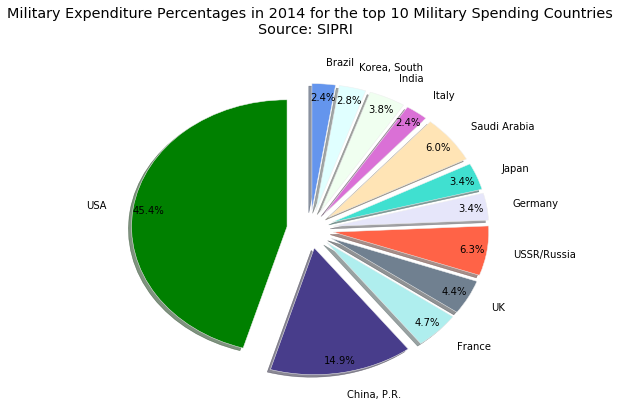

In [215]:
# Pie chart for top 12 countries Military Spendings in 2014
style.use('ggplot')

fig = plt.figure()

# Label list
top_12 = MltrySpnd_G20.index.tolist()
top_12 = top_12[0:12]

# Values list
slices = MltrySpnd_G20['2014'].tolist()
slices = slices[0:12]

# Colors list
colors_list = list(six.iteritems(colors.cnames))
colors_list

col_list = []
for i in range (0, 11+1):
    col_list.append(colors_list[i][1])
    
plt.pie(slices, labels=top_12,
        colors = col_list,
        startangle=90,
        shadow=True,
        explode=(0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15),
        autopct='%1.1f%%',pctdistance=0.9, labeldistance=1.17)

# Title
plt.title('Military Expenditure Percentages in 2014 for the top 10 Military Spending Countries\nSource: SIPRI  \n \n')


# To adjust edge distances of graph
plt.subplots_adjust(left=0, bottom=0.5, right=0.9, top=1.6,
                    wspace=0.2, hspace=0)

# Save Figure
#fig.savefig('Mil_Expenditure_PieChart.png', facecolor=fig.get_facecolor())

plt.show()

/Users/askar/anaconda/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


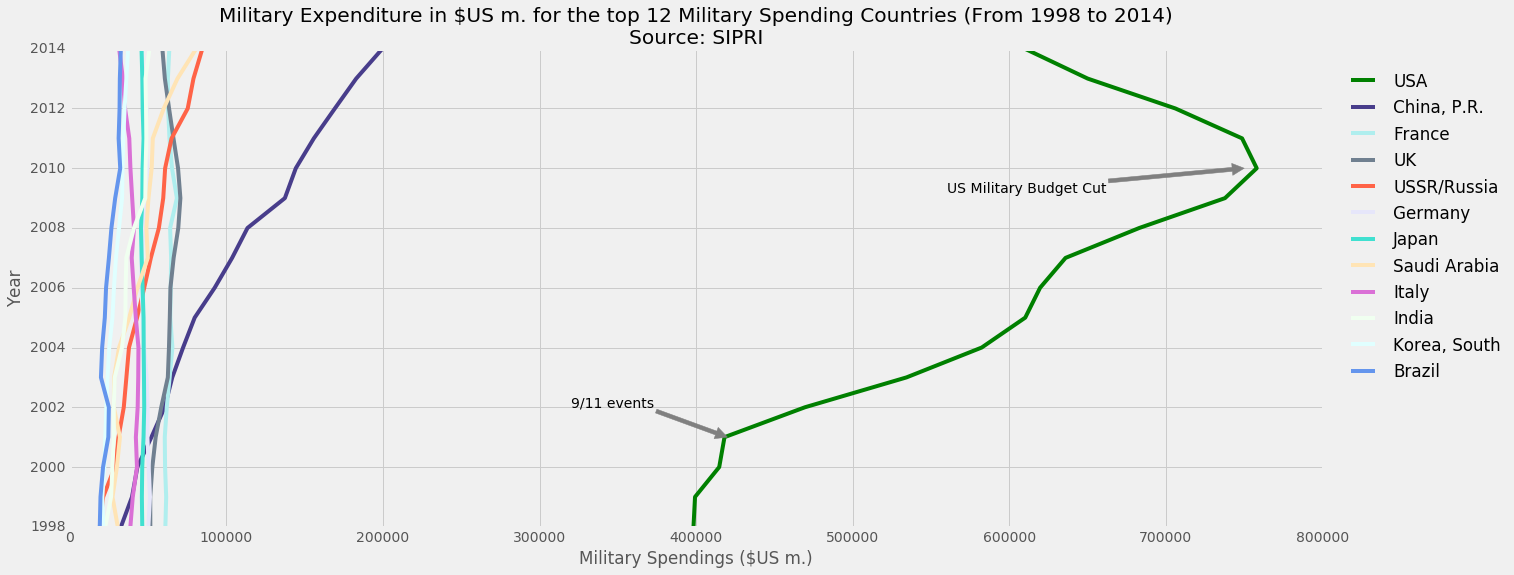

In [216]:
style.use('fivethirtyeight')

fig = plt.figure()

# Plot this data for all 12 countries 

# Create a list (years) that contains the column headers (1998 to 2014)
years = []
for i in range(1998, 2014+1):
    years.append(i)

# To get a list of colors
colors_list = list(six.iteritems(colors.cnames))
colors_list

# Label list
top_12 = MltrySpnd_G20.index.tolist()
top_12

# Plot size
plt.figure(figsize=(20,8))

# Plot function
def plot_data(df_index, years, MyColor):
    plt.plot(df_index, years, label=top_12[i], color= MyColor)

for i in range (0,12):
    plot_data(MltrySpnd_G20.ix[i], years, colors_list[i][1])

# Annatation
plt.annotate('US Military Budget Cut', (750000, 2010), xytext=(0.7, 0.7), textcoords='axes fraction',
            arrowprops= dict(facecolor='grey', color='grey'))

plt.annotate('9/11 events', (420000, 2001), xytext=(0.4, 0.25), textcoords='axes fraction',
            arrowprops= dict(facecolor='grey', color='grey'))

# Title, labels, and legends
plt.xlabel('Military Spendings ($US m.)')
plt.ylabel('Year')
plt.title('Military Expenditure in $US m. for the top 12 Military Spending Countries (From 1998 to 2014)\nSource: SIPRI')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)
plt.show()


/Users/askar/anaconda/lib/python3.5/site-packages/matplotlib/patches.py:107: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


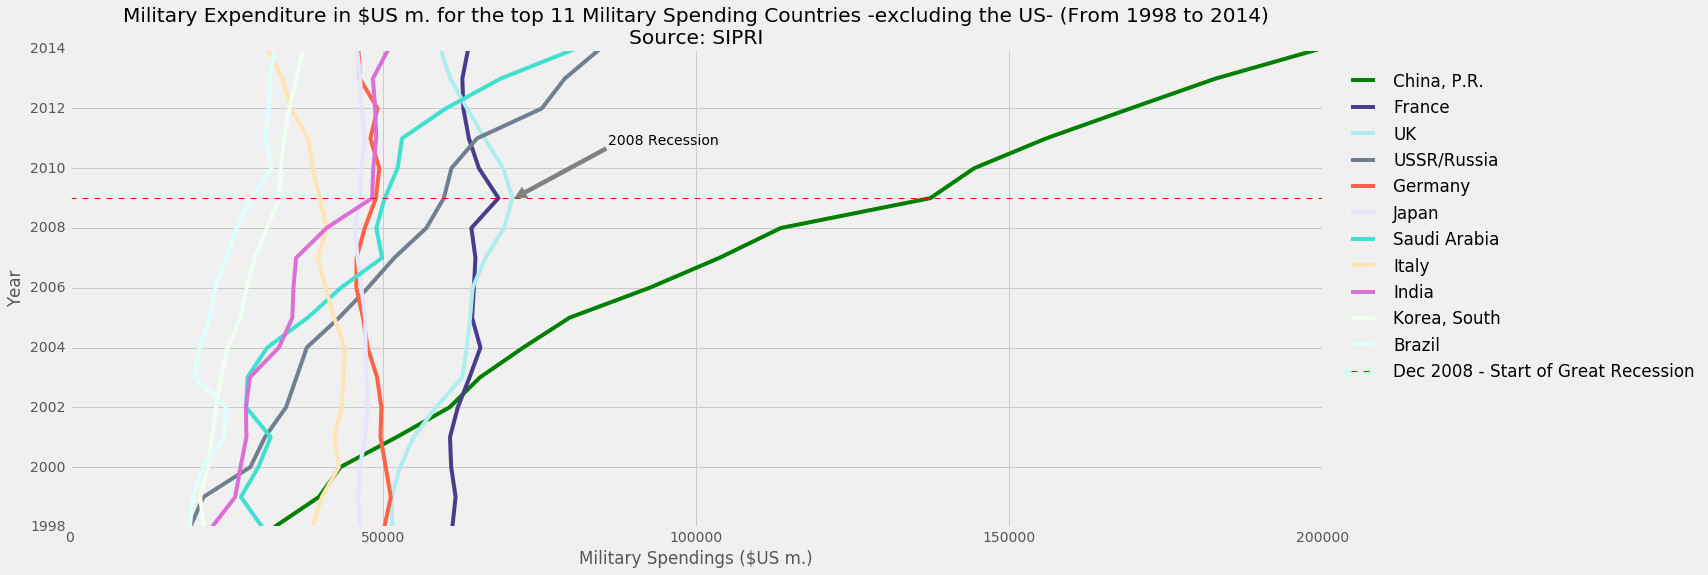

In [217]:
# Plot this data for 11 countries - excluding the US
MltrySpnd_G20_NoUSA = MltrySpnd_G20.drop(['USA'])

# Plot size
plt.figure(figsize=(20,8))

def plot_data(df_index, years, MyColor):
    plt.plot(df_index, years, label=top_12[i+1], color= MyColor)

for i in range (0,11):
    plot_data(MltrySpnd_G20_NoUSA.ix[i], years, colors_list[i][1])

# Annatation
plt.annotate('2008 Recession', (71000, 2009), xytext=(0.43, 0.8), textcoords='axes fraction', 
            arrowprops= dict(facecolor='grey', color='grey'))

# H-line
plt.axhline(2009, color='r', linewidth=1, ls='--', label='Dec 2008 - Start of Great Recession')

# Title, labels, and legends
plt.xlabel('Military Spendings ($US m.)')
plt.ylabel('Year')
plt.title('Military Expenditure in $US m. for the top 11 Military Spending Countries -excluding the US- (From 1998 to 2014)\nSource: SIPRI')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)
plt.show()

Section 2: 
- Import, cleanse, analyze, and plot GDP data.
- Join GDP and Military Spending data, compare and plot them

In [218]:
# Import GDP data, and rename columns
gdp = pd.read_csv('gdp-oa.csv')
gdp.rename(columns={'Country Name':'Country'}, inplace=True)
# Verify
gdp.head()
# Values in $US

,﻿Series Name,Series Code,Country,Country Code,1990 [YR1990],2000 [YR2000],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,9843842455.48323,10190529882.4878,12486943505.7381,15936800636.2487,17930239399.8149,20536542736.7297,20046334303.9661,20050189881.6659,19199437988.8023,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,2101624962.5,3632043907.78974,10701011896.7708,12881352687.7773,12044212903.8168,11926953258.916,12890867538.5302,12319784787.2987,12781029643.5936,13277963807.0823,11455595709.1413,..
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,62045098374.5482,54790060512.8887,134977088396.419,171000692134.748,137211039899.57,161207268840.911,200013050828.17,209047389599.67,209703529364.331,213518488688.12,166838617796.555,..
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,ADO,1028989393.70295,1401694155.6973,4010785102.05129,4001349339.57053,3649863492.52426,3346317328.52461,3427235708.64326,3146177740.6367,3249100666.87102,..,..,..


In [219]:
# Extract Countries to visually check whether the G20 countries names are consistant with the above G20 list
gdp_countries_list = gdp['Country'].tolist()
gdp_countries_list

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Pol

In [220]:
# Change some countries names to be consistant with previous data
gdp['Country_Index'] = gdp['Country']
gdp.set_index('Country_Index', inplace= True)

try:
    gdp.loc['China','Country'] = 'China, P.R.'
except:
    pass
try:
    gdp.loc['Korea, Rep.','Country'] = 'Korea, South'
except:
    pass
try:
    gdp.loc['United States','Country'] = 'USA'
except:
    pass
try:
    gdp.loc['United Kingdom','Country'] = 'UK'
except:
    pass
try:
    gdp.loc['Russian Federation','Country'] = 'USSR/Russia'
except:
    pass

gdp

,﻿Series Name,Series Code,Country,Country Code,1990 [YR1990],2000 [YR2000],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
Country_Index,,,,,,,,,,,,,,,,
Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,9843842455.48323,10190529882.4878,12486943505.7381,15936800636.2487,17930239399.8149,20536542736.7297,20046334303.9661,20050189881.6659,19199437988.8023,..
Albania,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,2101624962.5,3632043907.78974,10701011896.7708,12881352687.7773,12044212903.8168,11926953258.916,12890867538.5302,12319784787.2987,12781029643.5936,13277963807.0823,11455595709.1413,..
Algeria,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,62045098374.5482,54790060512.8887,134977088396.419,171000692134.748,137211039899.57,161207268840.911,200013050828.17,209047389599.67,209703529364.331,213518488688.12,166838617796.555,..
American Samoa,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
Andorra,GDP (current US$),NY.GDP.MKTP.CD,Andorra,ADO,1028989393.70295,1401694155.6973,4010785102.05129,4001349339.57053,3649863492.52426,3346317328.52461,3427235708.64326,3146177740.6367,3249100666.87102,..,..,..
Angola,GDP (current US$),NY.GDP.MKTP.CD,Angola,AGO,10027408249.2145,9129634978.33773,60448921272.2326,84178032716.0971,75492384801.3695,82470913120.7314,104115923082.737,115398371427.673,124912063308.202,126775134686.437,102643104696.208,..
Antigua and Barbuda,GDP (current US$),NY.GDP.MKTP.CD,Antigua and Barbuda,ATG,391570363.454988,783837851.851852,1289254333.33333,1347349851.85185,1206410370.37037,1135539037.03704,1129918370.37037,1204713111.11111,1200587518.51852,1220976000,1297285370.37037,..
Argentina,GDP (current US$),NY.GDP.MKTP.CD,Argentina,ARG,141352368714.691,284203750000,288833322724.044,363137495039.856,334490355492.26,425916078731.8,533200293249.748,548934618735.756,554155198994.424,529726189460.922,583168571071.407,..
Armenia,GDP (current US$),NY.GDP.MKTP.CD,Armenia,ARM,2256838858.42714,1911563665.39006,9206301700.39619,11662040713.8753,8647936747.98704,9260284937.79781,10142111334.4961,10619320048.5857,11121465767.4067,11644438422.9844,10561401185.098,..


In [221]:
# Select only the columns: Country and 2014
gdp = gdp[['Country', '2014 [YR2014]']]

In [222]:
# Country as index
gdp.set_index('Country', inplace= True)
gdp.head()

,2014 [YR2014]
Country,
Afghanistan,20050189881.6659
Albania,13277963807.0823
Algeria,213518488688.12
American Samoa,..
Andorra,..


In [223]:
# Print top_12 list
top_12

['USA',
 'China, P.R.',
 'France',
 'UK',
 'USSR/Russia',
 'Germany',
 'Japan',
 'Saudi Arabia',
 'Italy',
 'India',
 'Korea, South',
 'Brazil']

In [253]:
# Filter on only the G20 countries
#gdp_G20 = gdp.ix[G20['Country']]
gdp_G20 = gdp.ix[top_12]
gdp_G20.rename(columns={'2014 [YR2014]':'2014 GDP ($US m.)'}, inplace=True)
gdp_G20


/Users/askar/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,2014 GDP ($US m.)
Country,
USA,17348071500000
"China, P.R.",10351111762216.4
France,2829192039171.84
UK,2990201431078.23
USSR/Russia,2030972571014.27
Germany,3868291231823.77
Japan,4596156556721.9
Saudi Arabia,753831466666.667
Italy,2138540909211.12


In [225]:
# Join 2014 column to the Military Expenditure dataframe
MltrySpnd_gdp_jnd = MltrySpnd_G20.join(gdp_G20)
MltrySpnd_gdp_jnd

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014 GDP ($US m.)
Country,,,,,,,,,,,,,,,,,,
USA,398332.0,399314.0,414768.0,418135.0,469486.0,534351.0,582400.0,610176.0,619653.0,635921.0,682967.0,737747.0,757992.0,748646.0,706082.0,650081.0,609914.0,17348071500000
"China, P.R.",32715.0,39800.0,43230.0,52179.0,60642.0,65496.0,72415.0,79809.0,92586.0,103716.0,113527.0,137401.0,144383.0,155898.0,169321.0,182930.0,199651.0,10351111762216.4
France,61091.0,61607.0,60897.0,60711.0,61963.0,63826.0,65573.0,64235.0,64525.0,64773.0,64124.0,68451.0,65322.0,63725.0,62844.0,62686.0,63614.0,2829192039171.84
UK,51485.0,51421.0,52766.0,54901.0,58458.0,62661.0,63392.0,63922.0,64334.0,66370.0,69332.0,70679.0,69192.0,66271.0,63446.0,60766.0,59183.0,2990201431078.23
USSR/Russia,19243.0,21370.0,28838.0,31171.0,34530.0,36200.0,37847.0,43010.0,47601.0,51814.0,56933.0,59730.0,60940.0,65040.0,75364.0,79030.0,84697.0,2030972571014.27
Germany,50248.0,51272.0,50448.0,49619.0,49753.0,49073.0,47570.0,46830.0,45749.0,45789.0,47104.0,48885.0,49418.0,48004.0,49149.0,46312.0,46103.0,3868291231823.77
Japan,46331.0,46084.0,46315.0,47156.0,47576.0,47435.0,47245.0,47155.0,46558.0,45954.0,45515.0,46364.0,46527.0,47161.0,46584.0,46380.0,45867.0,4596156556721.9
Saudi Arabia,30704.0,27331.0,30123.0,32083.0,28166.0,28374.0,31543.0,38008.0,43297.0,49872.0,48949.0,50299.0,52350.0,53062.0,60041.0,68810.0,80762.0,753831466666.667
Italy,38744.0,40263.0,42956.0,42250.0,43406.0,43758.0,43897.0,42227.0,40867.0,39600.0,41049.0,39897.0,38772.0,38047.0,35342.0,33948.0,31571.0,2138540909211.12


In [226]:
# Convert values in 20114 GDP to floats
MltrySpnd_gdp_jnd['2014 GDP ($US m.)'] = MltrySpnd_gdp_jnd['2014 GDP ($US m.)'].astype(float)

# Verify types
MltrySpnd_gdp_jnd.dtypes

1998                 float64
1999                 float64
2000                 float64
2001                 float64
2002                 float64
2003                 float64
2004                 float64
2005                 float64
2006                 float64
2007                 float64
2008                 float64
2009                 float64
2010                 float64
2011                 float64
2012                 float64
2013                 float64
2014                 float64
2014 GDP ($US m.)    float64
dtype: object

In [227]:
# Convert 2014 GDP values unit from $US to $US m. to be consistent with the Expenditure
MltrySpnd_gdp_jnd['2014 GDP ($US m.)'] = MltrySpnd_gdp_jnd['2014 GDP ($US m.)']/ 1000000

# Choose only columns of 2014 Expenditure and 2014 GDP
MltrySpnd_gdp_jnd = MltrySpnd_gdp_jnd.ix[:,-2:]
MltrySpnd_gdp_jnd

,2014,2014 GDP ($US m.)
Country,,
USA,609914.0,1.734807e+07
"China, P.R.",199651.0,1.035111e+07
France,63614.0,2.829192e+06
UK,59183.0,2.990201e+06
USSR/Russia,84697.0,2.030973e+06
Germany,46103.0,3.868291e+06
Japan,45867.0,4.596157e+06
Saudi Arabia,80762.0,7.538315e+05
Italy,31571.0,2.138541e+06


In [228]:
# Rename 2014 to be 2014 Expenditure ($US m.)
MltrySpnd_gdp_jnd['2014 Expenditure ($US m.)'] = MltrySpnd_G20['2014']
MltrySpnd_gdp_jnd = MltrySpnd_gdp_jnd.ix[:,'2014 GDP ($US m.)':'2014 Expenditure ($US m.)']
MltrySpnd_gdp_jnd

,2014 GDP ($US m.),2014 Expenditure ($US m.)
Country,,
USA,1.734807e+07,609914.0
"China, P.R.",1.035111e+07,199651.0
France,2.829192e+06,63614.0
UK,2.990201e+06,59183.0
USSR/Russia,2.030973e+06,84697.0
Germany,3.868291e+06,46103.0
Japan,4.596157e+06,45867.0
Saudi Arabia,7.538315e+05,80762.0
Italy,2.138541e+06,31571.0


In [229]:
# Create a Correlation table 
GDP_Spndg_Correlation = MltrySpnd_gdp_jnd.corr()
print(GDP_Spndg_Correlation)

                           2014 GDP ($US m.)  2014 Expenditure ($US m.)
2014 GDP ($US m.)                   1.000000                   0.936868
2014 Expenditure ($US m.)           0.936868                   1.000000


In [230]:
# Compare 2014 expenditure with 2014 GDP for all countries
comparison = [MltrySpnd_gdp_jnd['2014 Expenditure ($US m.)'], MltrySpnd_gdp_jnd['2014 GDP ($US m.)']]
comparison = pd.DataFrame(comparison)
comparison

Country,USA,"China, P.R.",France,UK,USSR/Russia,Germany,Japan,Saudi Arabia,Italy,India,"Korea, South",Brazil
2014 Expenditure ($US m.),609914.0,1.996510e+05,6.361400e+04,5.918300e+04,8.469700e+04,4.610300e+04,4.586700e+04,80762.000000,3.157100e+04,5.091400e+04,3.728600e+04,3.266000e+04
2014 GDP ($US m.),17348071.5,1.035111e+07,2.829192e+06,2.990201e+06,2.030973e+06,3.868291e+06,4.596157e+06,753831.466667,2.138541e+06,2.042439e+06,1.411334e+06,2.417046e+06


In [231]:
# Get Avg for all countries
MltrySpnd_avg_2014 = comparison.loc['2014 Expenditure ($US m.)'].mean()
GDP_avg_2014 = comparison.loc['2014 GDP ($US m.)'].mean()

#  Get Avg for countries, excluding US
MltrySpnd_avg_2014_no_us = comparison.loc['2014 Expenditure ($US m.)'].drop('USA').mean()
GDP_avg_2014_no_us = comparison.loc['2014 GDP ($US m.)'].drop('USA').mean()

# Verify
print(MltrySpnd_avg_2014, GDP_avg_2014, MltrySpnd_avg_2014_no_us, GDP_avg_2014_no_us)


111851.83333333333 4398099.025774277 66573.45454545454 3220828.800844665


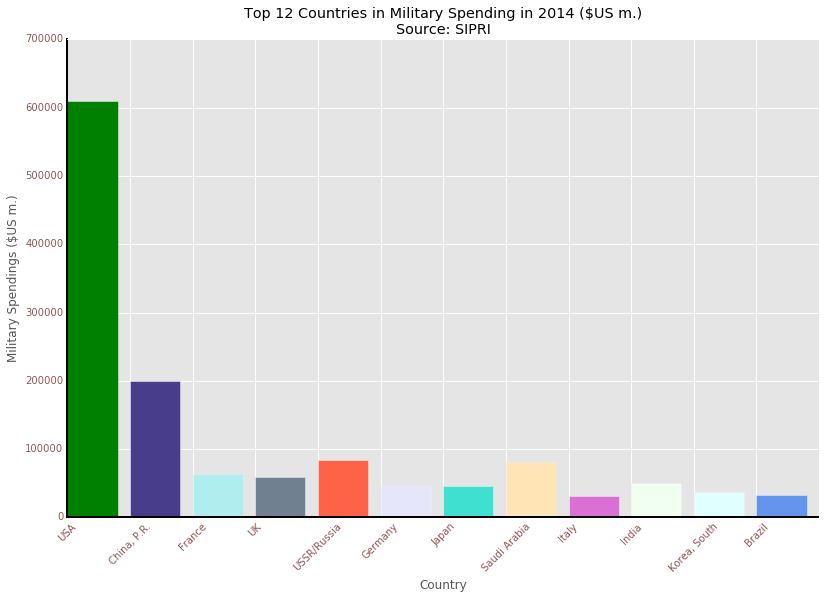

In [232]:
# Plot Military Spendings vs gdp

style.use('ggplot')
fig = plt.figure()

# Plot size
plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1),(0,0))

# Create Country index (to be linked with labels on x-axis) 
Country_index = []
for i in range (11+1):
    Country_index.append(i)
# Plot bar chart
for i in range (11+1):
    ax1.bar(Country_index[i], comparison.ix[0][i], color = colors_list[i],label= top_12[i])

# Customize labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')

# Customize labels
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Replace number on x-axis with labels
plt.xticks(Country_index, top_12)

# Title and labels
plt.title('Top 12 Countries in Military Spending in 2014 ($US m.)\nSource: SIPRI')
plt.xlabel('Country')
plt.ylabel('Military Spendings ($US m.)')
plt.show()

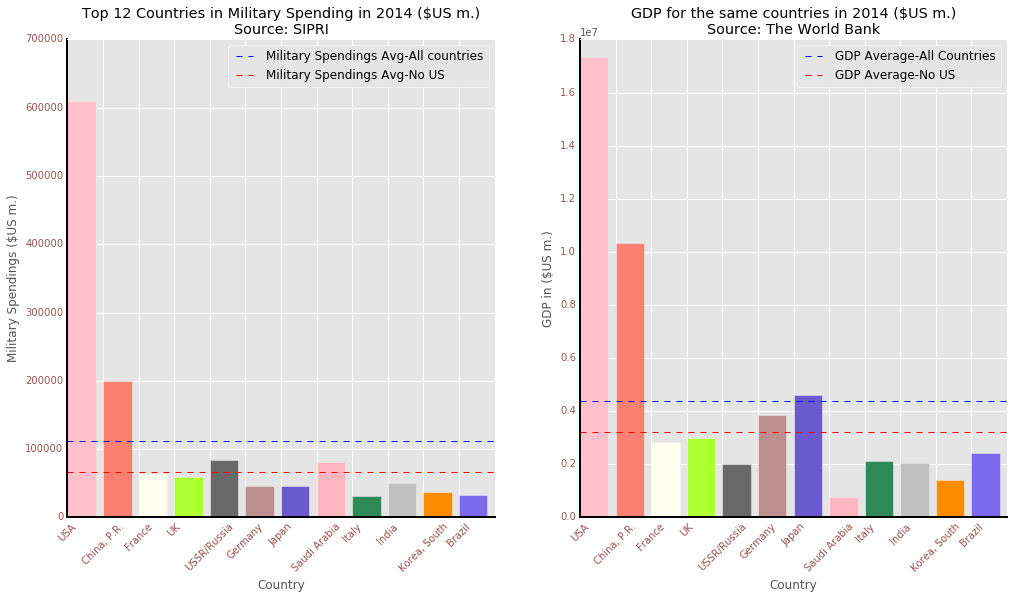

In [365]:
# Plot subplot barcharts of top 12 countries in Military Expenditures, and the GDP for those countries
style.use('ggplot')

# Plot Military Spendings vs gdp
fig = plt.figure()

# Bar Plot 
Country_index = []
for i in range (11+1):
    Country_index.append(i)

# Plot size
plt.figure(figsize=(15,8))

# Military Expenditure subPlot 
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
for i in range (11+1):
    ax1.bar(Country_index[i], comparison.ix[0][i], color = colors_list[i],label= '_nolegend_')

# Lables and title
plt.title('Top 12 Countries in Military Spending in 2014 ($US m.)\nSource: SIPRI') 
plt.xlabel('Country')
plt.ylabel('Military Spendings ($US m.)')
plt.xticks(Country_index, top_12)

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# H-lines
ax1.axhline(MltrySpnd_avg_2014, color='b', linewidth=1, ls='--', label='Military Spendings Avg-All countries')
ax1.axhline(MltrySpnd_avg_2014_no_us, color='r', linewidth=1, ls='--', label='Military Spendings Avg-No US')

# Customize labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')

for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

plt.legend()


# GDP subplot
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)

# Plot
for i in range (11+1):
    ax2.bar(Country_index[i], comparison.ix[1][i], color = colors_list[i],label='_nolegend_')

# Title and labels
plt.title('GDP for the same countries in 2014 ($US m.)\nSource: The World Bank')
plt.xlabel('Country')
plt.ylabel('GDP in ($US m.)')
plt.xticks(Country_index, top_12)

# Spines
ax2.spines['left'].set_color('k')
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_color('k')
ax2.spines['bottom'].set_linewidth(2)

# H-lines
ax2.axhline(GDP_avg_2014, color='b', linewidth=1, ls='--', label='GDP Average-All Countries')
ax2.axhline(GDP_avg_2014_no_us, color='r', linewidth=1, ls='--', label='GDP Average-No US')

# Labels customizations
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')
    
for label in ax2.yaxis.get_ticklabels():
    label.set_color('#955351')

plt.legend()
plt.show()

Section 3:
- Import, cleanse, analyze, and plot population data
- Join Population, GDP and Military Spending data, compare and plot them

In [233]:
# Import population data, and rename columns
population = pd.read_csv('population-oa.csv')
population.rename(columns={'Country Name':'Country'}, inplace=True)
population

,﻿Series Name,Series Code,Country,Country Code,1990 [YR1990],2000 [YR2000],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12067570,19701940.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803,30682500,31627506,32526562,..
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3089027.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247,2896652,2893654,2889167,..
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25912364,31183658.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427,38186135,38934334,39666519,..
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47044,57522.0,57904.0,57031.0,56226.0,55636.0,55316.0,55227,55302,55434,55538,..
4,"Population, total",SP.POP.TOTL,Andorra,ADO,54511,65399.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316,75902,72786,70473,..
5,"Population, total",SP.POP.TOTL,Angola,AGO,11127870,15058638.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632,23448202,24227524,25021974,..
6,"Population, total",SP.POP.TOTL,Antigua and Barbuda,ATG,61906,77648.0,84397.0,85350.0,86300.0,87233.0,88152.0,89069,89985,90900,91818,..
7,"Population, total",SP.POP.TOTL,Argentina,ARG,32729740,37057453.0,39969903.0,40381860.0,40798641.0,41222875.0,41655616.0,42095224,42538304,42980026,43416755,..
8,"Population, total",SP.POP.TOTL,Armenia,ARM,3544695,3076098.0,2988117.0,2975029.0,2966108.0,2963496.0,2967984.0,2978339,2992192,3006154,3017712,..
9,"Population, total",SP.POP.TOTL,Aruba,ABW,62148,90858.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393,102921,103441,103889,..


In [234]:
# Extract Countries column to a list
pop_countries_list = population['Country'].tolist()
pop_countries_list
# Visually check if the G20 countries names in population list are consistant with the above G20 list

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Pol

In [235]:
# Change names of some countries to be consistent with the G20 list
population['Country_Index'] = population['Country']
population.set_index('Country_Index', inplace= True)
try:
    population.loc['China','Country'] = 'China, P.R.'
except:
    pass
try:
    population.loc['Korea, Rep.','Country'] = 'Korea, South'
except:
    pass
try:
    population.loc['United States','Country'] = 'USA'
except:
    pass
try: 
    population.loc['United Kingdom','Country'] = 'UK'
except:
    pass
try: 
    population.loc['Russian Federation','Country'] = 'USSR/Russia'
except:
    pass

In [236]:
# Choose only two columns
population = population[['Country', '2014 [YR2014]']]
population.head()

,Country,2014 [YR2014]
Country_Index,,
Afghanistan,Afghanistan,31627506
Albania,Albania,2893654
Algeria,Algeria,38934334
American Samoa,American Samoa,55434
Andorra,Andorra,72786


In [237]:
# Set 'Country' column as the index
population.set_index('Country', inplace= True)
population.head()

,2014 [YR2014]
Country,
Afghanistan,31627506
Albania,2893654
Algeria,38934334
American Samoa,55434
Andorra,72786


In [238]:
# Filter on only the G20 countries
pop_G20 = population.ix[G20['Country']]
pop_G20.rename(columns={'2014 [YR2014]':'2014 Population'}, inplace=True)
# COnvert to floats and order descendingly
pop_G20['2014 Population'] = pop_G20['2014 Population'].astype(float)
pop_G20.sort_values(by='2014 Population', ascending=False, inplace = True)#
pop_G20

/Users/askar/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,2014 Population
Country,
"China, P.R.",1.364270e+09
India,1.295292e+09
USA,3.189074e+08
Indonesia,2.544548e+08
Brazil,2.060779e+08
USSR/Russia,1.438196e+08
Japan,1.271318e+08
Mexico,1.253858e+08
Germany,8.098250e+07


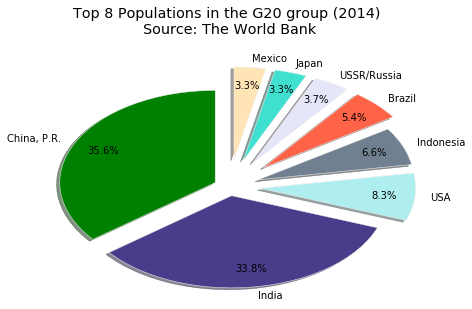

In [240]:
# Plot population trends
# Pie chart for top 8 countries Military Spendings in 2014
style.use('ggplot')

# Label list
top_8_pop = pop_G20.index.tolist()[0:8]

# Values list
slices = pop_G20['2014 Population'][0:8]
slices = slices[0:12]

# Colors list
colors_list = list(six.iteritems(colors.cnames))
colors_list

col_list = []
for i in range (0, 11+1):
    col_list.append(colors_list[i][1])

# Plot Piechart    
plt.pie(slices, labels=top_8_pop,
        colors = col_list,
        startangle=90,
        shadow=True,
        explode=(0.1,0.1,0.2,0.2,0.3,0.3,0.3,0.3),
        autopct='%1.1f%%',pctdistance=0.8, labeldistance=1.1)
# Title
plt.title('Top 8 Populations in the G20 group (2014) \nSource: The World Bank\n \n')


# To adjust edge distances of graph
plt.subplots_adjust(left=0, bottom=1, right=0.9, top=1.8,
                    wspace=0.1, hspace=1)

plt.show()

In [241]:
# Compare GDP, Military Expenditure, and Population for all 12 countries
MltrySpnd_gdp_pop_jnd = MltrySpnd_gdp_jnd.join(pop_G20)
MltrySpnd_gdp_pop_jnd = MltrySpnd_gdp_pop_jnd.ix[:,-3:]
MltrySpnd_gdp_pop_jnd

,2014 GDP ($US m.),2014 Expenditure ($US m.),2014 Population
Country,,,
USA,1.734807e+07,609914.0,3.189074e+08
"China, P.R.",1.035111e+07,199651.0,1.364270e+09
France,2.829192e+06,63614.0,6.649594e+07
UK,2.990201e+06,59183.0,6.461316e+07
USSR/Russia,2.030973e+06,84697.0,1.438196e+08
Germany,3.868291e+06,46103.0,8.098250e+07
Japan,4.596157e+06,45867.0,1.271318e+08
Saudi Arabia,7.538315e+05,80762.0,3.088654e+07
Italy,2.138541e+06,31571.0,6.078914e+07


In [242]:
# Convert all to floats
for column in MltrySpnd_gdp_pop_jnd:
    MltrySpnd_gdp_pop_jnd[column] = MltrySpnd_gdp_pop_jnd[column].astype(float)

In [243]:
# Verify types
MltrySpnd_gdp_pop_jnd.dtypes

2014 GDP ($US m.)            float64
2014 Expenditure ($US m.)    float64
2014 Population              float64
dtype: object

In [244]:
# Add Military Spendings Per Capita ($US)
MltrySpnd_gdp_pop_jnd['Military Spending Per Capita ($US)'] = 1000000*MltrySpnd_gdp_pop_jnd['2014 Expenditure ($US m.)'] / MltrySpnd_gdp_pop_jnd['2014 Population']
MltrySpnd_gdp_pop_jnd

,2014 GDP ($US m.),2014 Expenditure ($US m.),2014 Population,Military Spending Per Capita ($US)
Country,,,,
USA,1.734807e+07,609914.0,3.189074e+08,1912.511275
"China, P.R.",1.035111e+07,199651.0,1.364270e+09,146.342733
France,2.829192e+06,63614.0,6.649594e+07,956.659910
UK,2.990201e+06,59183.0,6.461316e+07,915.958916
USSR/Russia,2.030973e+06,84697.0,1.438196e+08,588.911513
Germany,3.868291e+06,46103.0,8.098250e+07,569.295836
Japan,4.596157e+06,45867.0,1.271318e+08,360.783061
Saudi Arabia,7.538315e+05,80762.0,3.088654e+07,2614.795536
Italy,2.138541e+06,31571.0,6.078914e+07,519.352634


In [245]:
# Compare GDP, Military Expenditure, Population, Military Spending/Capita, and GDP/Capita for all 12 countries
MltrySpnd_gdp_pop_jnd['GDP Per Capita ($US)'] = 1000000*MltrySpnd_gdp_pop_jnd['2014 GDP ($US m.)'] / MltrySpnd_gdp_pop_jnd['2014 Population']
MltrySpnd_gdp_pop_jnd

,2014 GDP ($US m.),2014 Expenditure ($US m.),2014 Population,Military Spending Per Capita ($US),GDP Per Capita ($US)
Country,,,,,
USA,1.734807e+07,609914.0,3.189074e+08,1912.511275,54398.460009
"China, P.R.",1.035111e+07,199651.0,1.364270e+09,146.342733,7587.289732
France,2.829192e+06,63614.0,6.649594e+07,956.659910,42546.838787
UK,2.990201e+06,59183.0,6.461316e+07,915.958916,46278.520213
USSR/Russia,2.030973e+06,84697.0,1.438196e+08,588.911513,14121.670543
Germany,3.868291e+06,46103.0,8.098250e+07,569.295836,47767.001906
Japan,4.596157e+06,45867.0,1.271318e+08,360.783061,36152.690017
Saudi Arabia,7.538315e+05,80762.0,3.088654e+07,2614.795536,24406.467822
Italy,2.138541e+06,31571.0,6.078914e+07,519.352634,35179.653952


In [246]:
# Expenditure as a percentage of GDP
MltrySpnd_gdp_pop_jnd['Expenditure as Pct. of GDP'] = 100*MltrySpnd_gdp_pop_jnd['2014 Expenditure ($US m.)'] / MltrySpnd_gdp_pop_jnd['2014 GDP ($US m.)'] 
MltrySpnd_gdp_pop_jnd

,2014 GDP ($US m.),2014 Expenditure ($US m.),2014 Population,Military Spending Per Capita ($US),GDP Per Capita ($US),Expenditure as Pct. of GDP
Country,,,,,,
USA,1.734807e+07,609914.0,3.189074e+08,1912.511275,54398.460009,3.515745
"China, P.R.",1.035111e+07,199651.0,1.364270e+09,146.342733,7587.289732,1.928788
France,2.829192e+06,63614.0,6.649594e+07,956.659910,42546.838787,2.248486
UK,2.990201e+06,59183.0,6.461316e+07,915.958916,46278.520213,1.979231
USSR/Russia,2.030973e+06,84697.0,1.438196e+08,588.911513,14121.670543,4.170268
Germany,3.868291e+06,46103.0,8.098250e+07,569.295836,47767.001906,1.191818
Japan,4.596157e+06,45867.0,1.271318e+08,360.783061,36152.690017,0.997943
Saudi Arabia,7.538315e+05,80762.0,3.088654e+07,2614.795536,24406.467822,10.713535
Italy,2.138541e+06,31571.0,6.078914e+07,519.352634,35179.653952,1.476287


In [255]:
# Correlation between GDP, Expenditure, population, Military Spending/Capita, GDP/Capita, and expenditure as Pct. of GDP
MltrySpnd_gdp_pop_corr = MltrySpnd_gdp_pop_jnd[['2014 GDP ($US m.)', '2014 Expenditure ($US m.)', '2014 Population',
                                               'Military Spending Per Capita ($US)', 'GDP Per Capita ($US)',
                                                'Expenditure as Pct. of GDP']]
MltrySpnd_gdp_pop_corr.corr()

,2014 GDP ($US m.),2014 Expenditure ($US m.),2014 Population,Military Spending Per Capita ($US),GDP Per Capita ($US),Expenditure as Pct. of GDP
2014 GDP ($US m.),1.000000,0.936868,0.311293,0.198164,0.314984,-0.133212
2014 Expenditure ($US m.),0.936868,1.000000,0.173508,0.439891,0.341781,0.114625
2014 Population,0.311293,0.173508,1.000000,-0.418778,-0.635184,-0.151235
Military Spending Per Capita ($US),0.198164,0.439891,-0.418778,1.000000,0.440344,0.814996
GDP Per Capita ($US),0.314984,0.341781,-0.635184,0.440344,1.000000,-0.117813
Expenditure as Pct. of GDP,-0.133212,0.114625,-0.151235,0.814996,-0.117813,1.000000


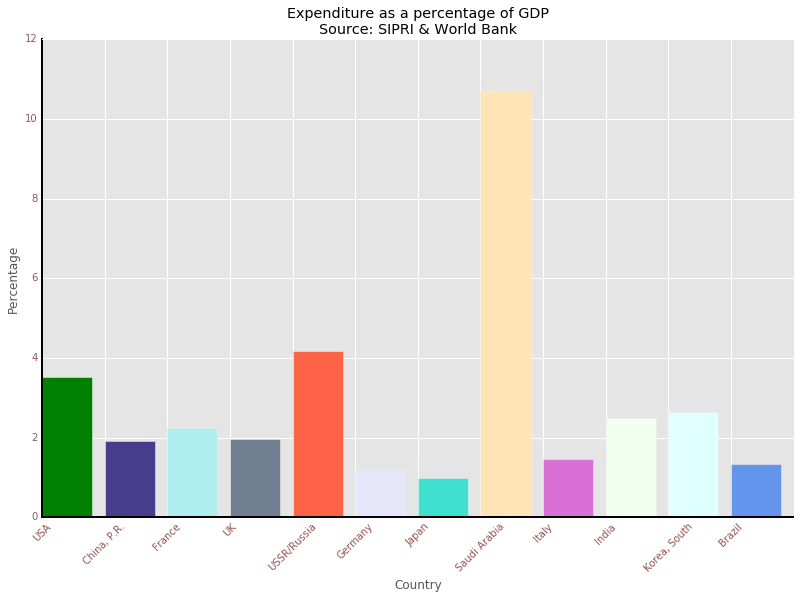

In [118]:
# Plot Expenditure as Pct. of GDP

style.use('ggplot')
# Plot Military Spendings vs gdp
fig = plt.figure()

# Plot size
plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((1,1),(0,0))

# Bar Plot 
Country_index = []
for i in range (11+1):
    Country_index.append(i)

# Plot
for i in range (11+1):
    ax1.bar(Country_index[i], MltrySpnd_gdp_pop_jnd.ix[i][5], color = colors_list[i],label= '_nolegend_')

# Customize labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')
    
for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Link Country_index to their string values
plt.xticks(Country_index, top_12)

# Title and labels
plt.title('Expenditure as a percentage of GDP\nSource: SIPRI & World Bank')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.show()

In [247]:
# Statistical insight
MltrySpnd_gdp_pop_jnd.describe()

,2014 GDP ($US m.),2014 Expenditure ($US m.),2014 Population,Military Spending Per Capita ($US),GDP Per Capita ($US),Expenditure as Pct. of GDP
count,1.200000e+01,12.000000,1.200000e+01,12.000000,12.000000,12.000000
mean,4.398099e+06,111851.833333,3.174741e+08,793.487690,29144.463669,2.892337
std,4.770056e+06,163275.066800,4.798578e+08,760.336788,17374.906109,2.636331
min,7.538315e+05,31571.000000,3.088654e+07,39.306981,1576.817669,0.997943
25%,2.039572e+06,43721.750000,6.365716e+07,310.208236,13523.452754,1.445024
50%,2.623119e+06,55048.500000,1.040572e+08,579.103674,31584.503972,2.113859
75%,4.050258e+06,81745.750000,2.342853e+08,926.134165,43479.759143,2.860360
max,1.734807e+07,609914.000000,1.364270e+09,2614.795536,54398.460009,10.713535


Section 4:
Military Expenditure Per Capita vs. GDP Per Capita

In [248]:
# Per Capita comparison
Per_Capita = MltrySpnd_gdp_pop_jnd[['GDP Per Capita ($US)','Military Spending Per Capita ($US)']]
Per_Capita

,GDP Per Capita ($US),Military Spending Per Capita ($US)
Country,,
USA,54398.460009,1912.511275
"China, P.R.",7587.289732,146.342733
France,42546.838787,956.659910
UK,46278.520213,915.958916
USSR/Russia,14121.670543,588.911513
Germany,47767.001906,569.295836
Japan,36152.690017,360.783061
Saudi Arabia,24406.467822,2614.795536
Italy,35179.653952,519.352634


In [249]:
# Correlation between GDP/Capita and Military Expenditure/Capita
Per_Capita_correlation = Per_Capita.corr()
print(Per_Capita_correlation)

                                    GDP Per Capita ($US)  \
GDP Per Capita ($US)                            1.000000   
Military Spending Per Capita ($US)              0.440344   

                                    Military Spending Per Capita ($US)  
GDP Per Capita ($US)                                          0.440344  
Military Spending Per Capita ($US)                            1.000000  


/Users/askar/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


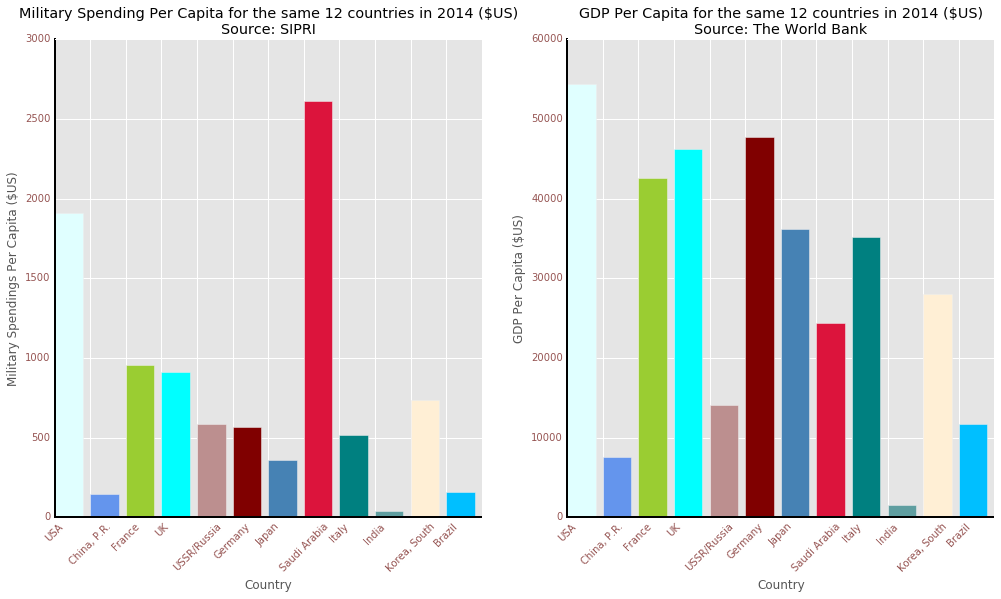

In [250]:
# Plot GDP Per Capita and Military Spending Per Capita
style.use('ggplot')

fig = plt.figure()

# Bar Plot 
Country_index = []
for i in range (11+1):
    Country_index.append(i)

# Plot size
plt.figure(figsize=(15,8))

# Military Spendings Per Capita subplot
ax1 = plt.subplot2grid((1,2), (0,0), rowspan=1, colspan=1)
for i in range (11+1):
    ax1.bar(Country_index[i], Per_Capita.ix[i][1], color = colors_list[i+10], label= '_nolegend_')

# Title and labels
plt.title('Military Spending Per Capita for the same 12 countries in 2014 ($US)\nSource: SIPRI')
plt.xlabel('Country')
plt.ylabel('Military Spendings Per Capita ($US)')
plt.xticks(Country_index, Per_Capita.index)

# Spines
ax1.spines['left'].set_color('k')
ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_color('k')
ax1.spines['bottom'].set_linewidth(2)

# Customize labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')

for label in ax1.yaxis.get_ticklabels():
    label.set_color('#955351')

plt.legend()

# GDP Per Capita subplot
ax2 = plt.subplot2grid((1,2), (0,1), rowspan=1, colspan=2)

for i in range (11+1):
    ax2.bar(Country_index[i], Per_Capita.ix[i][0], color = colors_list[i+10], label='_nolegend_')

# Labels and title
plt.title('GDP Per Capita for the same 12 countries in 2014 ($US)\nSource: The World Bank')
plt.xlabel('Country')
plt.ylabel('GDP Per Capita ($US)')
plt.xticks(Country_index, Per_Capita.index)

# Spines
ax2.spines['left'].set_color('k')
ax2.spines['left'].set_linewidth(2)
ax2.spines['bottom'].set_color('k')
ax2.spines['bottom'].set_linewidth(2)

# Customize labels
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_color('#955351')

for label in ax2.yaxis.get_ticklabels():
    label.set_color('#955351')

plt.legend()
plt.show()

In [251]:
# Sort Per_Capita dataframe by GDP Per Capita
Per_Capita.sort_values(by='GDP Per Capita ($US)', ascending=False)

,GDP Per Capita ($US),Military Spending Per Capita ($US)
Country,,
USA,54398.460009,1912.511275
Germany,47767.001906,569.295836
UK,46278.520213,915.958916
France,42546.838787,956.659910
Japan,36152.690017,360.783061
Italy,35179.653952,519.352634
"Korea, South",27989.353993,739.450128
Saudi Arabia,24406.467822,2614.795536
USSR/Russia,14121.670543,588.911513


In [252]:
# Sort Per_Capita dataframe by Military Spending Per Capita
Per_Capita.sort_values(by='Military Spending Per Capita ($US)', ascending=False)

,GDP Per Capita ($US),Military Spending Per Capita ($US)
Country,,
Saudi Arabia,24406.467822,2614.795536
USA,54398.460009,1912.511275
France,42546.838787,956.659910
UK,46278.520213,915.958916
"Korea, South",27989.353993,739.450128
USSR/Russia,14121.670543,588.911513
Germany,47767.001906,569.295836
Italy,35179.653952,519.352634
Japan,36152.690017,360.783061
